<a href="https://colab.research.google.com/github/lovishdany/DL_NCU/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import os
import zipfile

# Path to the zip file containing images
zip_file_path = '/content/cats_dogs_light.zip'

# Directory to extract the images
extracted_dir = 'extracted_images'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Define paths to train and test data
train_dir = '/content/extracted_images/cats_dogs_light/train'
test_dir = '/content/extracted_images/cats_dogs_light/test'

# Continue with the rest of the code (data preprocessing, model definition, training, etc.)


In [42]:
# Define paths to train and test data
extracted_dir = '/content/extracted_images/cats_dogs_light'
train_dir = os.path.join(extracted_dir, 'train')
test_dir = os.path.join(extracted_dir, 'test')


In [43]:
import os
import numpy as np
from PIL import Image

def load_images_from_directory(directory, target_size=(150, 150)):
    images = []
    labels = []
    try:
        # print("Listing files in directory:", directory)
        files = os.listdir(directory)
        # print("Files:", files)
        for file in files:
            file_path = os.path.join(directory, file)
            # print("Processing file:", file_path)
            # Check if it's an image file
            if any(file.endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.bmp']):
                try:
                    # print("Loading image:", file_path)
                    image = Image.open(file_path)
                    image = image.resize(target_size)
                    image = np.array(image) / 255.0  # Normalize the image
                    images.append(image)
                    labels.append(os.path.basename(file).split('.')[0])  # Extract label from filename
                    # print("Image loaded successfully.")
                except Exception as e:
                    print(f"Error processing image {file_path}: {e}")
            else:
                print(f"Skipping {file_path} as it's not an image file.")
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")
    return np.array(images), np.array(labels)


In [44]:
# Load train and test images
train_images, train_labels = load_images_from_directory(train_dir)
test_images, test_labels = load_images_from_directory(test_dir)

# Print the shape of the loaded data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (1000, 150, 150, 3)
Train labels shape: (1000,)
Test images shape: (400, 150, 150, 3)
Test labels shape: (400,)


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Convert labels to integer format
label_mapping = {'cat': 0, 'dog': 1}  # Define a mapping from label names to integer values
train_labels_int = np.array([label_mapping[label] for label in train_labels])
test_labels_int = np.array([label_mapping[label] for label in test_labels])


input_shape = (150, 150, 3)
num_classes = 2
batch_size = 200
epochs = 10

# Model definition
def SimpleCNN(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = SimpleCNN(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_images, train_labels_int,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_int)
)

# Save the model
model.save('SimpleCNN.keras')

Epoch 1/10
5/5 [==============================] - 2s 270ms/step - loss: 2.8980 - accuracy: 0.5300 - val_loss: 1.1269 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 1s 184ms/step - loss: 0.9589 - accuracy: 0.4690 - val_loss: 0.8048 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 1s 157ms/step - loss: 0.6866 - accuracy: 0.5760 - val_loss: 0.6836 - val_accuracy: 0.5825
Epoch 4/10
5/5 [==============================] - 1s 195ms/step - loss: 0.6439 - accuracy: 0.6500 - val_loss: 0.6675 - val_accuracy: 0.6025
Epoch 5/10
5/5 [==============================] - 1s 148ms/step - loss: 0.6174 - accuracy: 0.6790 - val_loss: 0.6626 - val_accuracy: 0.5825
Epoch 6/10
5/5 [==============================] - 1s 144ms/step - loss: 0.5659 - accuracy: 0.7360 - val_loss: 0.6272 - val_accuracy: 0.6550
Epoch 7/10
5/5 [==============================] - 1s 143ms/step - loss: 0.5178 - accuracy: 0.7810 - val_loss: 0.6128 - val_accuracy: 0.6775
Epoch 8/10
5/5 [====

In [46]:
def LeNet5(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape, padding='same'),
        layers.AvgPool2D(2, 2),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AvgPool2D(2, 2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = LeNet5(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_images, train_labels_int,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_int)
)

# Save the model
model.save('LeNet5.keras')

Epoch 1/10
5/5 [==============================] - 2s 227ms/step - loss: 0.6935 - accuracy: 0.5370 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 98ms/step - loss: 0.6740 - accuracy: 0.5860 - val_loss: 0.6821 - val_accuracy: 0.5300
Epoch 3/10
5/5 [==============================] - 0s 85ms/step - loss: 0.6513 - accuracy: 0.6230 - val_loss: 0.6664 - val_accuracy: 0.5700
Epoch 4/10
5/5 [==============================] - 0s 96ms/step - loss: 0.6123 - accuracy: 0.6620 - val_loss: 0.6991 - val_accuracy: 0.5600
Epoch 5/10
5/5 [==============================] - 0s 96ms/step - loss: 0.5825 - accuracy: 0.6860 - val_loss: 0.8830 - val_accuracy: 0.5075
Epoch 6/10
5/5 [==============================] - 0s 100ms/step - loss: 0.6057 - accuracy: 0.6530 - val_loss: 0.6697 - val_accuracy: 0.6100
Epoch 7/10
5/5 [==============================] - 0s 106ms/step - loss: 0.5622 - accuracy: 0.6920 - val_loss: 0.6898 - val_accuracy: 0.6025
Epoch 8/10
5/5 [========

In [47]:
#Alexnet
def AlexNet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 2),
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 2),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(3, 2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


model = AlexNet(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_images, train_labels_int,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_int)
)

# Save the model
model.save('AlexNet.keras')

Epoch 1/10
5/5 [==============================] - 5s 272ms/step - loss: 27.1279 - accuracy: 0.5360 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 1s 168ms/step - loss: 0.7032 - accuracy: 0.5250 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 1s 162ms/step - loss: 0.6914 - accuracy: 0.5440 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 1s 151ms/step - loss: 0.6883 - accuracy: 0.5450 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 1s 152ms/step - loss: 0.6847 - accuracy: 0.5420 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 1s 143ms/step - loss: 0.6851 - accuracy: 0.5490 - val_loss: 0.7107 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 1s 138ms/step - loss: 0.6784 - accuracy: 0.5510 - val_loss: 0.6920 - val_accuracy: 0.4975
Epoch 8/10
5/5 [===

In [48]:
def ResNet50(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze the convolutional base
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


model = ResNet50(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_images, train_labels_int,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_int)
)

# Save the model
model.save('ResNet50.keras')

Epoch 1/10
5/5 [==============================] - 8s 800ms/step - loss: 0.9394 - accuracy: 0.5160 - val_loss: 0.8234 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 2s 471ms/step - loss: 0.7348 - accuracy: 0.5600 - val_loss: 0.7805 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 2s 469ms/step - loss: 0.7067 - accuracy: 0.5240 - val_loss: 0.6866 - val_accuracy: 0.5425
Epoch 4/10
5/5 [==============================] - 3s 641ms/step - loss: 0.6915 - accuracy: 0.5390 - val_loss: 0.6913 - val_accuracy: 0.5275
Epoch 5/10
5/5 [==============================] - 2s 488ms/step - loss: 0.6750 - accuracy: 0.5680 - val_loss: 0.6864 - val_accuracy: 0.5575
Epoch 6/10
5/5 [==============================] - 2s 514ms/step - loss: 0.6628 - accuracy: 0.5570 - val_loss: 0.6828 - val_accuracy: 0.5725
Epoch 7/10
5/5 [==============================] - 2s 486ms/step - loss: 0.6611 - accuracy: 0.5990 - val_loss: 0.6877 - val_accuracy: 0.5675
Epoch 8/10
5/5 [====

1/1 [==============================] - 0s 64ms/step


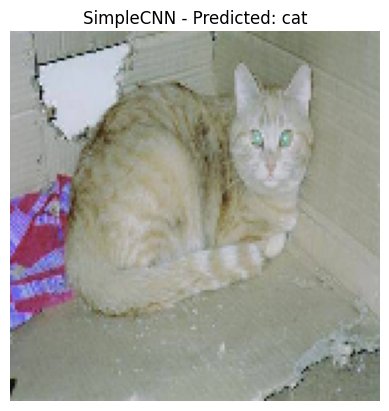

1/1 [==============================] - 0s 68ms/step


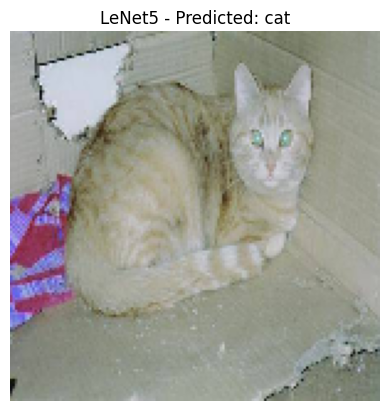

1/1 [==============================] - 0s 110ms/step


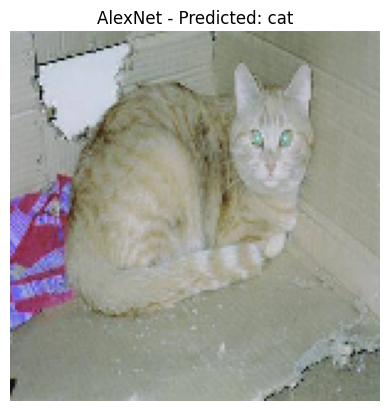

1/1 [==============================] - 1s 935ms/step


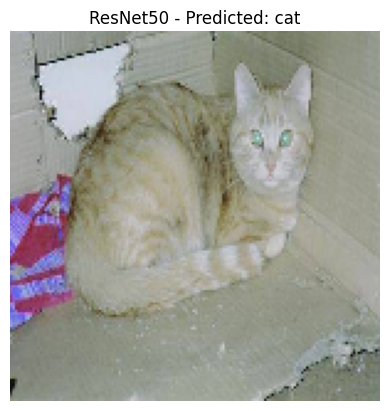

In [51]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directory containing the saved models
models_dir = '/content'

# List of model filenames
model_files = ['SimpleCNN.keras', 'LeNet5.keras', 'AlexNet.keras', 'ResNet50.keras']  # Add more model filenames as needed

# List to store loaded models
loaded_models = []

# Load each model
for model_file in model_files:
    model_path = os.path.join(models_dir, model_file)
    if os.path.exists(model_path):
        loaded_models.append(load_model(model_path))
    else:
        print(f"Error: Model file '{model_path}' not found.")

# Directory containing the test images
test_dir = '/content/extracted_images/cats_dogs_light/test'

# Choose a random image from the list
random_image = random.choice(os.listdir(test_dir))

# Get the full path to the random image
image_path = os.path.join(test_dir, random_image)

# Load and preprocess the random image
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make predictions using each model
for model_file, model in zip(model_files, loaded_models):
    # Get model name
    model_name = os.path.splitext(model_file)[0]

    # Make a prediction
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = "dog" if class_index[0] == 1 else "cat"  # Assuming 'dog' is class 1 and 'cat' is class 0

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} - Predicted: {predicted_class}')
    plt.show()


In [50]:
from tensorflow.keras.models import load_model

model_names = ["SimpleCNN", "LeNet5", "AlexNet", "ResNet50"]
test_results = {}

for name in model_names:
    # Load the model
    model_path = f'{name}.keras'
    model = load_model(model_path)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_images, test_labels_int)
    test_results[name] = test_accuracy
    print(f"\n{name} Accuracy: {test_accuracy:.4f}\n")

# Now you can compare the accuracies directly
best_model = max(test_results, key=test_results.get)
print("")
print(f"The best performing model is {best_model} with an accuracy of {test_results[best_model]:.4f}")


13/13 [==============================] - 0s 10ms/step - loss: 0.7107 - accuracy: 0.6225

SimpleCNN Accuracy: 0.6225

13/13 [==============================] - 0s 8ms/step - loss: 0.7657 - accuracy: 0.5800

LeNet5 Accuracy: 0.5800

13/13 [==============================] - 0s 13ms/step - loss: 0.7156 - accuracy: 0.4825

AlexNet Accuracy: 0.4825

13/13 [==============================] - 2s 55ms/step - loss: 0.6765 - accuracy: 0.5925

ResNet50 Accuracy: 0.5925


The best performing model is SimpleCNN with an accuracy of 0.6225
